# Classifier Evaluation

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn_evaluation import plot, table
import matplotlib.pyplot as plt

sklearn-evluation has two main modules for evaluating classifiers: [sklearn_evaluation.plot](../api/plot.rst) and [sklearn_evaluation.table](../api/table.rst), let’s see an example of how to use them.

First, let’s load some data and split it in training and test set.

In [2]:
data = datasets.make_classification(200, 10, n_informative=5,
                                    class_sep=0.65)

In [4]:
X = data[0]
y = data[1]
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now, we are going to train the data using one of the scikit-learn classifiers.

In [5]:
est = RandomForestClassifier(n_estimators=5)
est.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

Most of the functions require us to pass the class predictions for the test set (``y_pred``), the scores assigned (``y_score``) and the ground truth classes (``y_true``), let’s define such variables.

In [6]:
y_pred = est.predict(X_test)
y_score = est.predict_proba(X_test)
y_true = y_test

We can start evaluating our model, the following example shows how to plot a confusion matrix.

<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

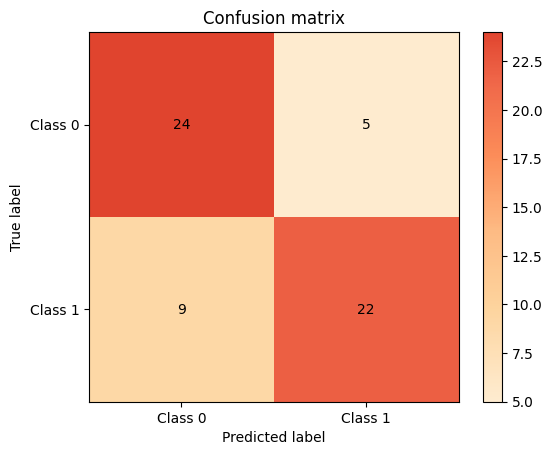

In [7]:
plot.confusion_matrix(y_true, y_pred)

Some classifiers (such as [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](sklearn.ensemble.RandomForestClassifier) have feature importances, we can plot then passing the estimator object to the feature_importances function.

<AxesSubplot: title={'center': 'Feature importances'}>

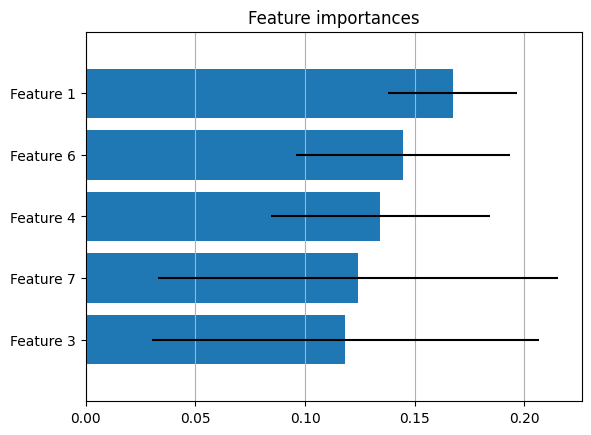

In [8]:
plot.feature_importances(est, top_n=5)

A feature importances function is also available in the table module.

In [9]:
print(table.feature_importances(est))

+----------------+--------------+-----------+
| feature_name   |   importance |      std_ |
+================+==============+===========+
| Feature 1      |    0.167263  | 0.0882181 |
+----------------+--------------+-----------+
| Feature 6      |    0.144729  | 0.0912218 |
+----------------+--------------+-----------+
| Feature 4      |    0.134272  | 0.050006  |
+----------------+--------------+-----------+
| Feature 7      |    0.124053  | 0.0486692 |
+----------------+--------------+-----------+
| Feature 3      |    0.118431  | 0.0295227 |
+----------------+--------------+-----------+
| Feature 10     |    0.0833002 | 0.0542978 |
+----------------+--------------+-----------+
| Feature 2      |    0.0779076 | 0.0431557 |
+----------------+--------------+-----------+
| Feature 5      |    0.0601379 | 0.0663137 |
+----------------+--------------+-----------+
| Feature 8      |    0.048916  | 0.0296595 |
+----------------+--------------+-----------+
| Feature 9      |    0.0409897 | 

Now, let’s see how to generate two of the most common plots for evaluating classifiers: Precision-Recall and ROC.

<AxesSubplot: title={'center': 'Precision-Recall'}, xlabel='Recall', ylabel='Precision'>

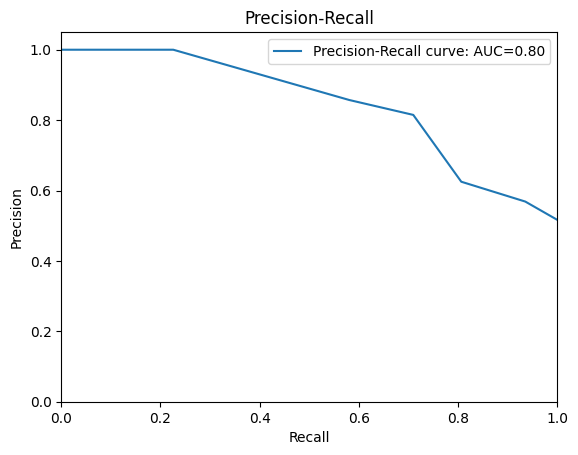

In [10]:
plot.precision_recall(y_true, y_score)

<AxesSubplot: title={'center': 'ROC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

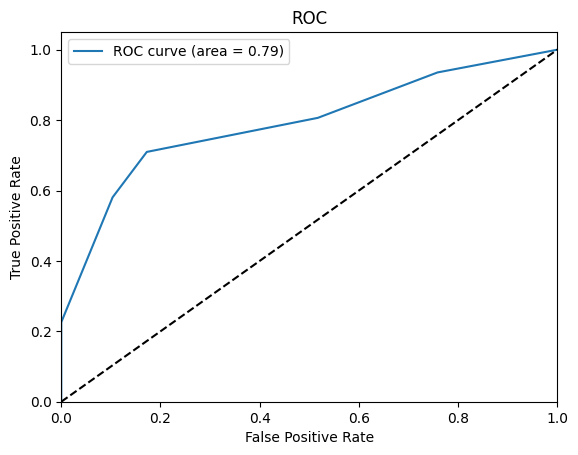

In [11]:
plot.roc(y_true, y_score)